In [0]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the dataset , naming the columns and printing the first 5 **rows** 

In [0]:
col_names = ['para1','para2','para3','para4','para5','para6','para7','para8','para9','para10','para11','para12','para13','para14','para15','para16','target']
data = pd.read_csv('/content/drive/My Drive/datset.csv', header = None, names=col_names)
data.head()


,para1,para2,para3,para4,para5,para6,para7,para8,para9,para10,para11,para12,para13,para14,para15,para16,target
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [0]:
feature_cols = ['para1','para2','para3','para4','para5','para6','para7','para8','para9','para10','para11','para12','para13','para14','para15','para16']
X = data[feature_cols]
y = data.target

# Splitting the data into train and **test**

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

# To check the shape of the dataset

In [0]:
X_train.shape

(5995, 16)

# Applying Nueral Network algorithm to the dataset

In [0]:
model = Sequential([Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
                   Dense(64, activation='relu'),
                   Dense(10, activation='softmax')])

In [0]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_49 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_50 (Dense)             (None, 10)                650       
Total params: 3,306
Trainable params: 3,306
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# Fitting of the model

In [0]:
history = model.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=1)

Train on 4796 samples, validate on 1199 samples
Epoch 1/40
4796/4796 [==============================] - 2s 317us/step - loss: 6.8003 - acc: 0.4952 - val_loss: 4.4102 - val_acc: 0.6614
Epoch 2/40
4796/4796 [==============================] - 0s 55us/step - loss: 3.9679 - acc: 0.7083 - val_loss: 4.1823 - val_acc: 0.7048
Epoch 3/40
4796/4796 [==============================] - 0s 53us/step - loss: 3.8582 - acc: 0.7396 - val_loss: 4.1520 - val_acc: 0.7156
Epoch 4/40
4796/4796 [==============================] - 0s 50us/step - loss: 3.8132 - acc: 0.7483 - val_loss: 4.1410 - val_acc: 0.7181
Epoch 5/40
4796/4796 [==============================] - 0s 51us/step - loss: 2.8209 - acc: 0.8000 - val_loss: 2.4547 - val_acc: 0.8232
Epoch 6/40
4796/4796 [==============================] - 0s 51us/step - loss: 2.1254 - acc: 0.8563 - val_loss: 2.4315 - val_acc: 0.8307
Epoch 7/40
4796/4796 [==============================] - 0s 50us/step - loss: 2.1121 - acc: 0.8611 - val_loss: 2.4264 - val_acc: 0.8282
Epoch 

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

# Plotting of the graph

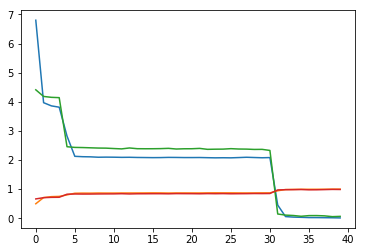

In [0]:
plt.plot(history.epoch, history.history['loss'], 
        history.epoch, history.history['acc'], 
        history.epoch, history.history['val_loss'],
        history.epoch, history.history['val_acc'])

# Predicting the test and train data

In [0]:
model.evaluate(X_test, y_test)

1499/1499 [==============================] - 0s 28us/step


[0.05767496993232163, 0.9853235490326885]